<a href="https://colab.research.google.com/github/JacksonHassell/DSP-Project/blob/main/DSP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [142]:
df = pd.read_csv('./Spotify-2000.csv', thousands=',')

In [143]:
print(len(df['Artist'].value_counts()))

731


In [144]:
#Drop Index because we don't need two indices. 
#Drop title because each title is different and it adds no information.
#Drop artist because there are 700 different artists and one-hot-encoding each one will add a bunch of noise to our models
df.drop(['Index', 'Title', 'Artist'], axis=1, inplace=True)

In [145]:
# Standardize numerical values
def standardize_column(column):
  return (column-column.min())/(column.max()-column.min())

df_encoded = df.copy()
columns_to_standardize = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity', 'Year']
for col in columns_to_standardize:
  df_encoded[col] = standardize_column(df_encoded[col])

df_encoded = df_encoded.join(pd.get_dummies(df_encoded['Top Genre']))
df_encoded = df_encoded.drop('Top Genre', axis=1)

Try Clustering

Find best k

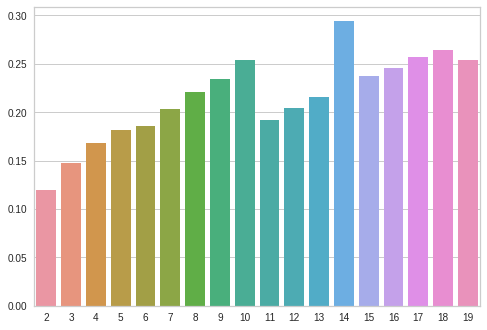

In [146]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


n_clusters = 2
best_score = 0
cluster_sizes = []
scores = []
for i in range(2, 20, 1):
  model = KMeans(n_clusters = i, random_state=42).fit(df_encoded)
  score = silhouette_score(df_encoded, model.labels_, metric='euclidean')
  if score > best_score:
    n_clusters = i
    best_score = score
  scores.append(score)
  cluster_sizes.append(i)

sns.barplot(x=cluster_sizes, y=scores)

In [147]:
model = KMeans(n_clusters = n_clusters, random_state=42).fit(df_encoded)

def std(x): return np.std(x)
def var(x): return np.var(x)

df_display = df_encoded.copy()
df_display['Cluster'] = model.labels_
df_display['Genre'] = df['Top Genre']
df_display['Year'] = df['Year']
print(df_display.groupby(by='Cluster').agg(['mean', 'max', std, var]))

                Year                              Beats Per Minute (BPM)  \
                mean   max        std         var                   mean   
Cluster                                                                    
0        2004.072289  2018  11.238684  126.308027               0.485635   
1        1984.451220  2019  14.886688  221.613474               0.509381   
2        1980.883777  2019  12.353590  152.611190               0.502543   
3        1999.800000  2019   8.058004   64.931429               0.517413   
4        1979.016260  2017  15.350636  235.642012               0.473998   
5        2005.950769  2019   9.305947   86.600653               0.526518   
6        1984.877551  2018  10.193300  103.903374               0.440285   
7        1994.700405  2019  16.786083  281.772591               0.453034   
8        2000.725490  2018   9.079342   82.434448               0.488688   
9        1989.550000  2019  12.228962  149.547500               0.501036   
10       199

In [148]:
for i in range(0, n_clusters):
  print(df_display[df_display['Cluster'] == i]['Genre'].value_counts())
  print('-----------------------------------------')

dance pop    83
Name: Genre, dtype: int64
-----------------------------------------
dance rock          51
british invasion    31
Name: Genre, dtype: int64
-----------------------------------------
album rock    413
Name: Genre, dtype: int64
-----------------------------------------
alternative metal    70
Name: Genre, dtype: int64
-----------------------------------------
adult standards    123
Name: Genre, dtype: int64
-----------------------------------------
modern rock                   46
irish rock                    25
permanent wave                24
alternative dance             15
glam metal                    14
british soul                  12
big beat                      10
britpop                        9
modern folk rock               7
big room                       7
celtic rock                    6
chamber pop                    6
art pop                        6
boy band                       5
carnaval limburg               5
dutch metal                    4
funk 